In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde

In [35]:
df = pd.read_csv('telecom_customer_churn.csv') 
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,1,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,1,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,0,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,0,Dissatisfaction,Network reliability


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

In [37]:
df.drop(['Churn Category','Churn Reason'], axis=1, inplace=True) 
obj_col = df.select_dtypes(include='object') 
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,1
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,1
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,0
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,0


In [38]:
for i in obj_col: 
    print(i, ":", obj_col[i].unique()) 

obj_col.drop(['Customer ID', 'City'], axis=1, inplace=True) 
obj_col['Offer'].value_counts().index[0] 

for i in obj_col: 
    obj_col[i].fillna(method='ffill', inplace=True) 

for i in obj_col: 
    print(i, ":", obj_col[i].unique()) 

df_obj = pd.DataFrame() 

Customer ID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-RRAMN' '9993-LHIEB'
 '9995-HOTOH']
Gender : ['Female' 'Male']
Married : ['Yes' 'No']
City : ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Kirkwood' 'Carpinteria'
 'Meadow Valley']
Offer : ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' nan]
Internet Service : ['Yes' 'No']
Internet Type : ['Cable' 'Fiber Optic' 'DSL' nan]
Online Security : ['No' 'Yes' nan]
Online Backup : ['Yes' 'No' nan]
Device Protection Plan : ['No' 'Yes' nan]
Premium Tech Support : ['Yes' 'No' nan]
Streaming TV : ['Yes' 'No' nan]
Streaming Movies : ['No' 'Yes' nan]
Streaming Music : ['No' 'Yes' nan]
Unlimited Data : ['Yes' 'No' nan]
Contract : ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Gender : ['Female' 'Male']
Married : ['Yes' 'No']
Offer : ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' '

In [39]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

for i in obj_col: 
    df_obj[i] = le.fit_transform(obj_col[i]) 

df_obj.head() 
df_obj.info() 
num_col = df.select_dtypes(exclude='object') 
num_col.head() 
num_col.info() 
num_col.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  6589 non-null   int32
 1   Married                 6589 non-null   int32
 2   Offer                   6589 non-null   int32
 3   Phone Service           6589 non-null   int32
 4   Multiple Lines          6589 non-null   int32
 5   Internet Service        6589 non-null   int32
 6   Internet Type           6589 non-null   int32
 7   Online Security         6589 non-null   int32
 8   Online Backup           6589 non-null   int32
 9   Device Protection Plan  6589 non-null   int32
 10  Premium Tech Support    6589 non-null   int32
 11  Streaming TV            6589 non-null   int32
 12  Streaming Movies        6589 non-null   int32
 13  Streaming Music         6589 non-null   int32
 14  Unlimited Data          6589 non-null   int32
 15  Contract             

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,5945.000000,5245.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,93491.504477,36.199761,-119.757670,2.020944,34.499772,25.496246,26.225929,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,0.716345
std,16.841362,0.968499,1857.575392,2.472459,2.155696,3.024016,23.968734,14.198424,19.565724,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,0.450805
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000
25%,33.000000,0.000000,92103.000000,33.989524,-121.788090,0.000000,12.000000,13.140000,13.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,0.000000
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,25.720000,21.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,1.000000
75%,60.000000,0.000000,95333.000000,38.169605,-117.967399,3.000000,57.000000,37.690000,30.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,1.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.000000


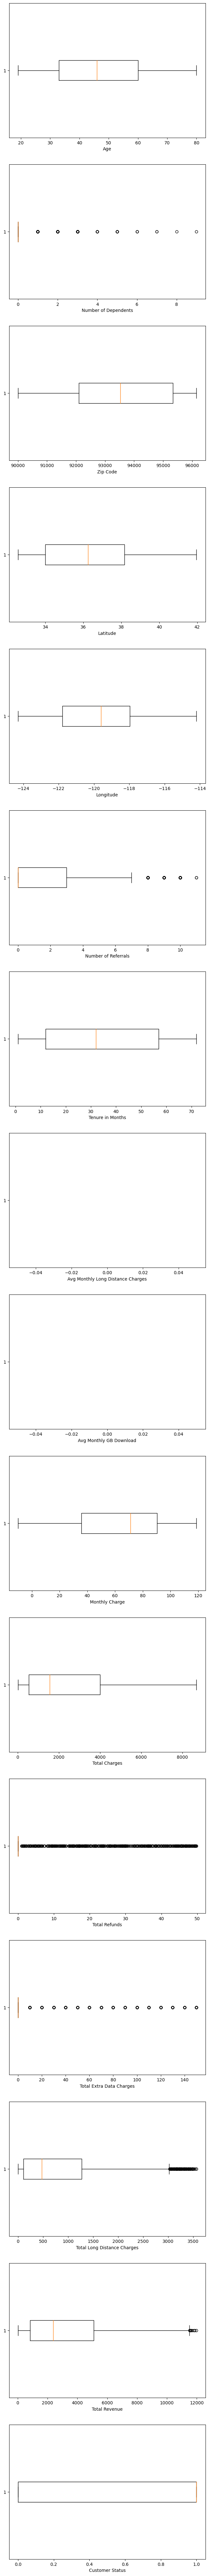

In [40]:
plt.figure(figsize=(8, 250)) 
c = 1 
for i in num_col: 
    ax = plt.subplot(38, 1, c) 
    plt.boxplot(num_col[i], vert=False) 
    plt.xlabel(i) 
    c += 1 
plt.show() 

In [41]:
num_col.drop(['Zip Code', 'Latitude', 'Longitude'], axis=1, inplace=True) 

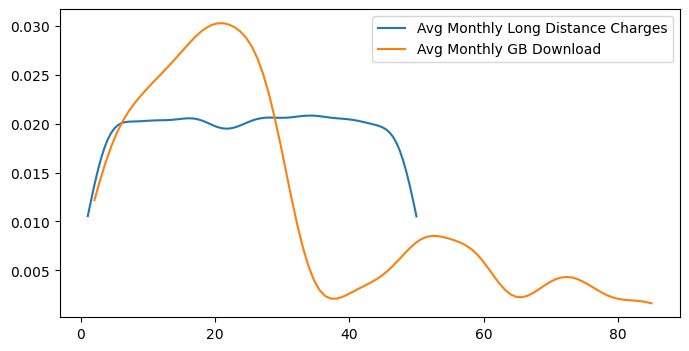

In [42]:
plt.figure(figsize=(8, 4)) 
density1 = gaussian_kde(num_col['Avg Monthly Long Distance Charges'].dropna())
density2 = gaussian_kde(num_col['Avg Monthly GB Download'].dropna())
x1 = np.linspace(num_col['Avg Monthly Long Distance Charges'].min(), num_col['Avg Monthly Long Distance Charges'].max(), 100)
x2 = np.linspace(num_col['Avg Monthly GB Download'].min(), num_col['Avg Monthly GB Download'].max(), 100)
plt.plot(x1, density1(x1), label='Avg Monthly Long Distance Charges')
plt.plot(x2, density2(x2), label='Avg Monthly GB Download')
plt.legend()
plt.show() 

In [43]:
num_col['Avg Monthly Long Distance Charges'].fillna(num_col['Avg Monthly Long Distance Charges'].mean(), inplace=True) 
num_col['Avg Monthly GB Download'].fillna(num_col['Avg Monthly GB Download'].mean(), inplace=True) 
num_col.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6589 non-null   int64  
 1   Number of Dependents               6589 non-null   int64  
 2   Number of Referrals                6589 non-null   int64  
 3   Tenure in Months                   6589 non-null   int64  
 4   Avg Monthly Long Distance Charges  6589 non-null   float64
 5   Avg Monthly GB Download            6589 non-null   float64
 6   Monthly Charge                     6589 non-null   float64
 7   Total Charges                      6589 non-null   float64
 8   Total Refunds                      6589 non-null   float64
 9   Total Extra Data Charges           6589 non-null   int64  
 10  Total Long Distance Charges        6589 non-null   float64
 11  Total Revenue                      6589 non-null   float

In [44]:
df_final = df_obj.join(num_col) 
df_final.head() 

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,...,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,1,0,1,0,1,0,0,1,0,...,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81,1
1,1,0,0,1,1,1,0,0,0,0,...,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,0,5,1,0,1,2,0,0,1,...,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,1,4,1,0,1,2,0,1,1,...,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,1,0,1,0,1,2,0,0,0,...,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54,0


In [45]:
x = df_final.iloc[:, :-1] 
y = df_final.iloc[:, -1].values 

In [46]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [47]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

x_train[l] = sc.fit_transform(x_train[l]) 
x_test[l] = sc.transform(x_test[l]) 

x_train = x_train.values 
x_test = x_test.values 

x_train 
x_test 

array([[ 1.        ,  0.        ,  5.        , ..., -0.27281341,
        -0.91531959, -1.09667056],
       [ 1.        ,  1.        ,  0.        , ..., -0.27281341,
         0.43720267, -0.5478789 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.27281341,
        -0.93035097, -0.04570733],
       ...,
       [ 1.        ,  1.        ,  4.        , ..., -0.27281341,
        -0.71410353, -0.7555499 ],
       [ 0.        ,  1.        ,  2.        , ..., -0.27281341,
         0.27715447,  1.05450168],
       [ 0.        ,  0.        ,  5.        , ..., -0.27281341,
        -0.8915412 , -1.09517963]])

In [48]:
from sklearn.linear_model import LogisticRegression 
reg = LogisticRegression() 
reg.fit(x_train, y_train) 
y_pred = reg.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

print(confusion_matrix(y_pred, y_test)) 
print(classification_report(y_pred, y_test)) 
print("Accuracy of model is:", accuracy_score(y_pred, y_test))

[[ 407  152]
 [ 163 1255]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       559
           1       0.89      0.89      0.89      1418

    accuracy                           0.84      1977
   macro avg       0.80      0.81      0.80      1977
weighted avg       0.84      0.84      0.84      1977

Accuracy of model is: 0.8406676783004552
